In [1]:
# Importando bibliotecas
import pandas as pd
import statistics as sts
import seaborn as srn

In [2]:
# Importando dados
dataset = pd.read_csv("../csv/funcionarios_nivel25.csv")

# Vendo head da tabela
dataset.head()

,Nome,Idade,Salário,Setor,Ativo
0,João,25,3000.0,TI,sim
1,Maria,-5,4000.0,RH,não
2,Pedro,45,NaN,Comercial,sim
3,Ana,30,999999.0,Finanças,NaN
4,Carlos,150,2800.0,Financeiro,sim


### Duplicatas
Vendo se há algum funcionário duplicado pelo nome, idade e setor

In [ ]:
# Fazendo Verificação
dataset.duplicated(subset=["Nome","Idade","Setor"]).sum()

np.int64(1)

In [8]:
# Dropando duplicata
dataset.drop_duplicates(subset=["Nome","Idade","Setor"], keep="first",inplace=True)

### Idades
Analisando idades que estejam erradas ou nulas

#### Critérios:
- Idade NÃO pode ser negativa
- Idade não deve ser maior que 120 (Quase impossivel alguém com essa idade, quanto mais superior a ela)

In [10]:
# Primeiramente Verificando se existe algum valor nulo
dataset["Idade"].isnull().sum()

np.int64(0)

In [ ]:
# Verificando se existem idades fora de índice
dataset.loc[(dataset["Idade"] < 0)|(dataset["Idade"] > 120)]

,Nome,Idade,Salário,Setor,Ativo
1,Maria,-5,4000.0,RH,não
4,Carlos,150,2800.0,Financeiro,sim


- Idades fora de índice
#### O que fazer?
- Pegar a mediana das idades e substituir esses valores por ela

In [14]:
# Pegando a mediana
mediana = sts.median(dataset["Idade"])
mediana

35

In [15]:
# Substituindo valores 
dataset.loc[(dataset["Idade"] < 0)|(dataset["Idade"] > 120), "Idade"] = mediana

In [16]:
# Conferindo
dataset.loc[(dataset["Idade"] < 0)|(dataset["Idade"] > 120)]

,Nome,Idade,Salário,Setor,Ativo


### Salário
- Ver histograma dos salários
- Ver se há valores nulos
- Analisar Salários (Negativos ou fora de realidade)

<Axes: xlabel='Salário', ylabel='Count'>

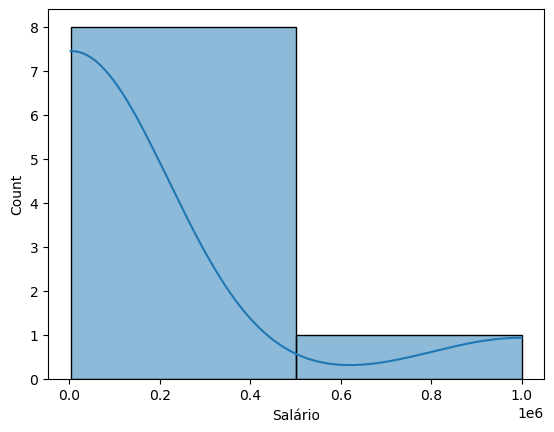

In [18]:
# Criando histograma
srn.histplot(dataset["Salário"], bins=2, kde=True)

Não soube exatamente analisar o gráfico do histograma, porém da pra notar que tem apenas um valor que está muito descrepante!

Text(0.5, 1.0, 'Salário')

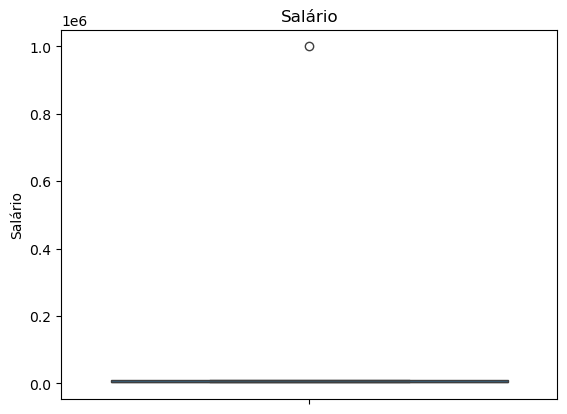

In [22]:
# Criando um boxplot que sei analisar melhor
srn.boxplot(dataset["Salário"]).set_title("Salário")

In [28]:
# Vendo se há valores nulos
dataset["Salário"].isnull().sum()

np.int64(2)

In [20]:
# Vendo se há algum salário negativo ou acima de 10.000
dataset.loc[(dataset["Salário"] < 0)|(dataset["Salário"] > 10000)]

,Nome,Idade,Salário,Setor,Ativo
3,Ana,30,999999.0,Finanças,NaN


#### Conclusões:
- 2 valores nulos
- Sem valores negativos
- Apenas um caso específico de salário fora da curva

### O que fazer?
- Pegar a mediana do salário
- Substituir valores pela mediana

In [24]:
# Pegando mediana
mediana = sts.median(dataset["Salário"])
mediana

3500.0

In [29]:
# Substituindo
dataset.loc[dataset["Salário"] > 10000, "Salário"] = mediana
dataset.fillna({"Salário":mediana}, inplace=True)

In [27]:
# Verificando
dataset.loc[dataset["Salário"] > 10000]

,Nome,Idade,Salário,Setor,Ativo


In [30]:
# Verificando
dataset["Salário"].isnull().sum()

np.int64(0)

### Setor
- Padronizar Setores
- Ver valores nulos

In [31]:
# Verificando os grupos existentes
agrupado = dataset.groupby(["Setor"]).size()
agrupado

Setor
Comercial     1
FINANÇAS      1
Finance       1
Financeiro    2
Finanças      1
RH            2
TI            1
comercial     1
finance       1
dtype: int64

#### Padronizar para:
- Financeiro
- RH
- TI
- Comercial

In [32]:
# Padronizando
dataset.loc[dataset["Setor"].isin(["Finance","FINANÇAS","Finanças","finance"]), "Setor"] = "Financeiro"
dataset.loc[dataset["Setor"] == "comercial", "Setor"] = "Comercial"

In [35]:
# Verificando
agrupado = dataset.groupby(["Setor"]).size()
agrupado

Setor
Comercial     2
Financeiro    6
RH            2
TI            1
dtype: int64

In [36]:
# Verificando valores nulos
dataset["Setor"].isnull().sum()

np.int64(0)

<Axes: ylabel='Setor'>

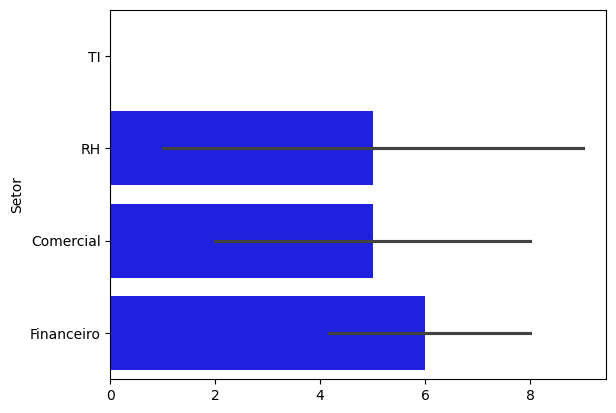

In [34]:
# Analisando como está o gráfico dos setores
srn.barplot(dataset["Setor"], color='blue')

>> Comentário:
>> Pelo gráfico notamos que o maior setor é o financeiro e o menor é TI

### Ativo
- Tratar valores nulos com a moda

In [38]:
# Verificando a quantidade de nulos
dataset["Ativo"].isnull().sum()

np.int64(2)

In [41]:
# Pegando a moda
moda = sts.mode(dataset["Ativo"])
moda

'sim'

In [43]:
# Substituindo
dataset.fillna({"Ativo":moda}, inplace=True)